# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Logan Choi

I have used the following AI tools: ChatGPT

I understand that my submission needs to be my own work: LC

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [21]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [22]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [23]:
# make sure numpy is installed
!pip install -q numpy

In [24]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [25]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('east')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [26]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [39]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: west
step 2 - action: east
step 3 - action: east
step 4 - action: south
step 5 - action: south
step 6 - action: west
step 7 - action: east
step 8 - action: suck
step 9 - action: west
step 10 - action: north
step 11 - action: west
step 12 - action: north
step 13 - action: east
step 14 - action: south
step 15 - action: east
step 16 - action: suck
step 17 - action: suck
step 18 - action: south
step 19 - action: west


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [207]:
def environment(agent_function, max_steps, verbose=True, n=5, p=0.2):
    num_cleaned = 0
    steps = 0
    # Initialize room: 0 = clean, 1 = dirty
    room = np.random.choice([0, 1], size=(n, n), p=[1 - p, p])

    # Random starting position
    agent_position = (np.random.randint(0, n), np.random.randint(0, n))

    if verbose:
        print("Initial Room State:\n", room)

    while np.any(room == 1) and steps < max_steps:  # Ensure steps increments properly
        x, y = agent_position
        dirty = room[x, y] == 1  # Check if the current tile is dirty
        bumpers = {
            "north": x == 0,
            "south": x == n - 1,
            "west": y == 0,
            "east": y == n - 1
        }

        action = agent_function(bumpers, dirty)

        # Perform action
        if action == "suck" and dirty:
            room[x, y] = 0
            num_cleaned += 1
        elif action == "north" and not bumpers["north"]:
            agent_position = (x - 1, y)
        elif action == "south" and not bumpers["south"]:
            agent_position = (x + 1, y)
        elif action == "west" and not bumpers["west"]:
            agent_position = (x, y - 1)
        elif action == "east" and not bumpers["east"]:
            agent_position = (x, y + 1)

        steps += 1  # Increment step count

        if verbose:
            print(f"Step {steps}: Action={action}, Position={agent_position}, Cleaned={num_cleaned}")

        if num_cleaned == np.sum(room == 1):  # Stop when the room is completely clean
            break

    return num_cleaned, steps


In [225]:
# Your code and description goes here
environment(simple_randomized_agent, max_steps = 10)

Initial Room State:
 [[0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 1]]
Step 1: Action=east, Position=(2, 4), Cleaned=0
Step 2: Action=west, Position=(2, 3), Cleaned=0
Step 3: Action=south, Position=(3, 3), Cleaned=0
Step 4: Action=south, Position=(4, 3), Cleaned=0
Step 5: Action=west, Position=(4, 2), Cleaned=0
Step 6: Action=north, Position=(3, 2), Cleaned=0
Step 7: Action=east, Position=(3, 3), Cleaned=0
Step 8: Action=south, Position=(4, 3), Cleaned=0
Step 9: Action=east, Position=(4, 4), Cleaned=0
Step 10: Action=suck, Position=(4, 4), Cleaned=1


(1, 10)

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [209]:
# Your code and description goes here
def simple_reflex_agent(bumpers, dirty):
    """A simple reflex agent that sucks dirt when detected or moves randomly while avoiding walls."""
    if dirty:
        return "suck"
    
    # Choose a random movement that is not blocked by a bumper
    possible_moves = [action for action in ["north", "east", "west", "south"] if not bumpers[action]]
    
    return np.random.choice(possible_moves) if possible_moves else "suck"  # Default to "suck" if stuck

Show how the agent works with your environment.

In [210]:
# Your code and description goes here
environment(simple_reflex_agent, max_steps = 10)

Initial Room State:
 [[1 0 1 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]]
Step 1: Action=west, Position=(0, 3), Cleaned=0
Step 2: Action=west, Position=(0, 2), Cleaned=0
Step 3: Action=suck, Position=(0, 2), Cleaned=1
Step 4: Action=south, Position=(1, 2), Cleaned=1
Step 5: Action=east, Position=(1, 3), Cleaned=1
Step 6: Action=west, Position=(1, 2), Cleaned=1
Step 7: Action=north, Position=(0, 2), Cleaned=1
Step 8: Action=south, Position=(1, 2), Cleaned=1
Step 9: Action=east, Position=(1, 3), Cleaned=1
Step 10: Action=west, Position=(1, 2), Cleaned=1


(1, 10)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [244]:
# Your short description of the state and your implementation goes here
def model_based_reflex_agent(bumpers, dirty):
    global agent_state
    x, y = agent_state["position"]
    
    # If the current tile is dirty, clean it
    if dirty:
        agent_state["dirty_tiles"].discard((x, y))
        return "suck"
    
    # Mark the tile as visited
    agent_state["visited"].add((x, y))
    
    # Move strategically: Explore unvisited tiles first
    for direction, condition in bumpers.items():
        new_position = move_in_direction(x, y, direction)
        if not condition and new_position not in agent_state["visited"]:
            agent_state["position"] = new_position
            return direction
    
    # If all nearby tiles are visited, move systematically (e.g., zigzag pattern)
    possible_moves = [d for d in ["east", "south", "west", "north"] if not bumpers[d]]
    if possible_moves:
        chosen_move = possible_moves[0]
        agent_state["position"] = move_in_direction(x, y, chosen_move)
        return chosen_move
    
    return "suck"  # If completely stuck, default to sucking (although the tile should already be clean)


def move_in_direction(x, y, direction):
    if direction == "north":
        return (x - 1, y)
    elif direction == "south":
        return (x + 1, y)
    elif direction == "west":
        return (x, y - 1)
    elif direction == "east":
        return (x, y + 1)
    return (x, y)  # No movement if invalid direction


# Initialize the agent's state
def reset_agent_state(n):
    global agent_state
    agent_state = {
        "position": (np.random.randint(0, n), np.random.randint(0, n)),
        "visited": set(),
        "dirty_tiles": set()
    }




Show how the agent works with your environment.

In [254]:
# Your code goes here
# Example usage
n = 5  # Grid size
reset_agent_state(n)
environment(model_based_reflex_agent, max_steps=100, verbose=True, n=n, p=0.2)

Initial Room State:
 [[0 0 0 1 0]
 [0 1 0 0 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Step 1: Action=south, Position=(1, 2), Cleaned=0
Step 2: Action=south, Position=(2, 2), Cleaned=0
Step 3: Action=south, Position=(3, 2), Cleaned=0
Step 4: Action=south, Position=(4, 2), Cleaned=0
Step 5: Action=west, Position=(4, 1), Cleaned=0
Step 6: Action=suck, Position=(4, 1), Cleaned=1
Step 7: Action=north, Position=(3, 1), Cleaned=1
Step 8: Action=suck, Position=(3, 1), Cleaned=2
Step 9: Action=north, Position=(2, 1), Cleaned=2
Step 10: Action=suck, Position=(2, 1), Cleaned=3
Step 11: Action=north, Position=(1, 1), Cleaned=3
Step 12: Action=suck, Position=(1, 1), Cleaned=4
Step 13: Action=north, Position=(0, 1), Cleaned=4
Step 14: Action=west, Position=(0, 0), Cleaned=4
Step 15: Action=south, Position=(1, 0), Cleaned=4
Step 16: Action=south, Position=(2, 0), Cleaned=4
Step 17: Action=suck, Position=(2, 0), Cleaned=5
Step 18: Action=south, Position=(3, 0), Cleaned=5
Step 19: Action=south, Positi

(7, 28)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [265]:
import matplotlib.pyplot as plt

# Initialize lists to store the results
grid_sizes = [5, 10, 100]
random_steps = []
reflex_steps = []
model_steps = []
random_cleaned = []
reflex_cleaned = []
model_cleaned = []

# Perform the simulation
for size in grid_sizes:
    steps_random = 0
    steps_reflex = 0
    steps_model = 0
    cleaned_random = 0
    cleaned_reflex = 0
    cleaned_model = 0
    
    for i in range(100):  # 100 random runs
        reset_agent_state(size)

        # Running the environment simulation for each agent
        steps_random += environment(simple_randomized_agent, max_steps=1000, verbose=False, n=size)[1]
        steps_reflex += environment(simple_reflex_agent, max_steps=1000, verbose=False, n=size)[1]
        steps_model += environment(model_based_reflex_agent, max_steps=1000, verbose=False, n=size)[1]

        cleaned_random += environment(simple_randomized_agent, max_steps=1000, verbose=False, n=size)[0]
        cleaned_reflex += environment(simple_reflex_agent, max_steps=1000, verbose=False, n=size)[0]
        cleaned_model += environment(model_based_reflex_agent, max_steps=1000, verbose=False, n=size)[0]

    # Append the average values for the current grid size
    random_steps.append(steps_random / 100)
    reflex_steps.append(steps_reflex / 100)
    model_steps.append(steps_model / 100)
    random_cleaned.append(cleaned_random / 100)
    reflex_cleaned.append(cleaned_reflex / 100)
    model_cleaned.append(cleaned_model / 100)

    # Print the results for each grid size
    print(f"Random Agent average steps for {size}x{size} grid: {random_steps[-1]}")
    print(f"Random Agent average cleaned tiles for {size}x{size} grid: {random_cleaned[-1]}")
    print(f"Reflex Agent average steps for {size}x{size} grid: {reflex_steps[-1]}")
    print(f"Reflex Agent average cleaned tiles for {size}x{size} grid: {reflex_cleaned[-1]}")
    print(f"Model-Based Reflex Agent average steps for {size}x{size} grid: {model_steps[-1]}")
    print(f"Model Agent average cleaned tiles for {size}x{size} grid: {model_cleaned[-1]}")



Random Agent average steps for 5x5 grid: 229.38
Random Agent average cleaned tiles for 5x5 grid: 3.19
Reflex Agent average steps for 5x5 grid: 70.97
Reflex Agent average cleaned tiles for 5x5 grid: 4.05
Model-Based Reflex Agent average steps for 5x5 grid: 17.7
Model Agent average cleaned tiles for 5x5 grid: 3.22
Random Agent average steps for 10x10 grid: 751.12
Random Agent average cleaned tiles for 10x10 grid: 11.6
Reflex Agent average steps for 10x10 grid: 488.87
Reflex Agent average cleaned tiles for 10x10 grid: 15.34
Model-Based Reflex Agent average steps for 10x10 grid: 86.79
Model Agent average cleaned tiles for 10x10 grid: 11.99
Random Agent average steps for 100x100 grid: 1000.0
Random Agent average cleaned tiles for 100x100 grid: 22.3
Reflex Agent average steps for 100x100 grid: 1000.0
Reflex Agent average cleaned tiles for 100x100 grid: 63.71
Model-Based Reflex Agent average steps for 100x100 grid: 1000.0
Model Agent average cleaned tiles for 100x100 grid: 165.76


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 229.38| 70.97| 17.7|
| 10x10   | 751.12| 488.87| 86.79|
| 100x100 | 1000.0| 1000.0| 1000.0|

Add charts to compare the performance of the different agents.

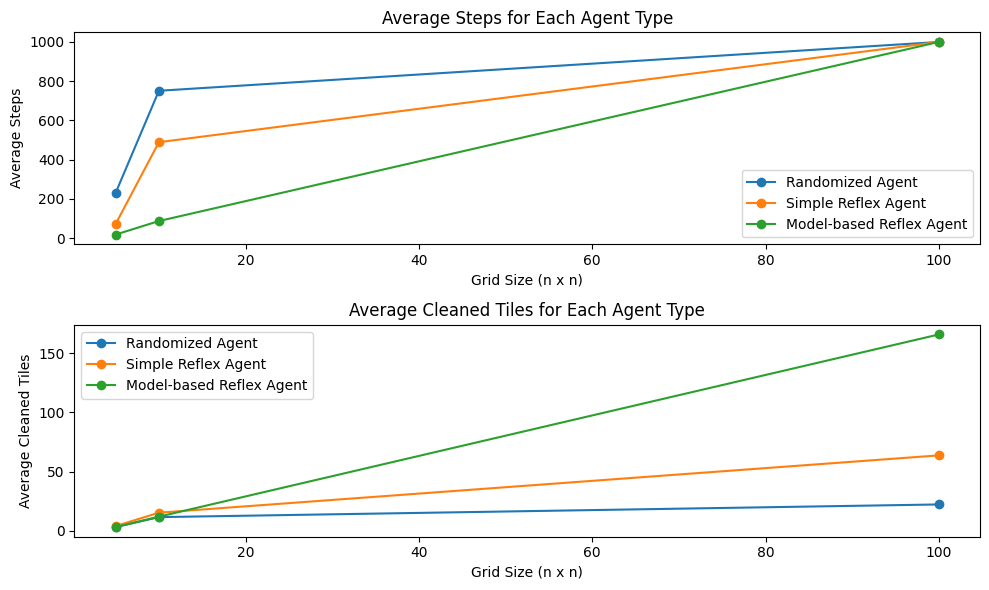

In [266]:
# Your graphs and discussion of the results goes here

# Plot the results
plt.figure(figsize=(10, 6))

# Plot steps
plt.subplot(2, 1, 1)
plt.plot(grid_sizes, random_steps, label="Randomized Agent", marker='o')
plt.plot(grid_sizes, reflex_steps, label="Simple Reflex Agent", marker='o')
plt.plot(grid_sizes, model_steps, label="Model-based Reflex Agent", marker='o')
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Average Steps")
plt.title("Average Steps for Each Agent Type")
plt.legend()

# Plot cleaned tiles
plt.subplot(2, 1, 2)
plt.plot(grid_sizes, random_cleaned, label="Randomized Agent", marker='o')
plt.plot(grid_sizes, reflex_cleaned, label="Simple Reflex Agent", marker='o')
plt.plot(grid_sizes, model_cleaned, label="Model-based Reflex Agent", marker='o')
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Average Cleaned Tiles")
plt.title("Average Cleaned Tiles for Each Agent Type")
plt.legend()

plt.tight_layout()
plt.show()

The results and efficiency of all models match expectations; however, steps average out at the max for all models once the enviornments grow too big because the robots only stop once there are no longer dirty tiles.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

If my agent is put into a rectangular room of unknown size it most likely only clean within the nxn grid it keeps track of. However, this is easily fixed by modifying the grid which it keeps track of. The same for the randomized agent and simple reflex agent. They need to be modified as they are programmed to operate wiithin a nxn grid. Thus, none of my agents can currently operate effectively within irregularly shaped rooms. As for obstacles, this also brings up problems since the bumpers only interprets walls with its bumpers. If the dirt sensor is not perfect and gives 10% of the time a wrong reading then my model based agent will misinterpret having cleaned the whole room. The others would not be affected by this since they act on reflex or random action and don't keep track of what tile has been traversed. Realistically, if the bumper sensor was not perfect, the agent would simply bump into the wall before it's next action in which it would probably detect the wall. In hindsight my agent implementation is not very robust but very much optimized for its square enviornment without obstacles. This is a consequence of running simulations completely in a virtual enviornment where things have to be hard coded as a means of imitating percepts.


## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [37]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [38]:
# Your ideas/code